## Greedy Permutation

Sometimes, you will want to perform persistent homology on a point cloud with many points, but as you may have discovered, ripser.py grinds to a halt even on H1 if the number of points exceeds around 1000.  To mitigate this, we provide a routine that intelligently subsamples the points via "furthest point sampling."  Please see
https://gist.github.com/ctralie/128cc07da67f1d2e10ea470ee2d23fe8
or refer to the paper


[1] Nicholas J Cavanna, Mahmoodreza Jahanseir, Donald R Sheehy, "A geometric perspective on sparse filtrations" 


for more details.



In [13]:
%load_ext autoreload
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import tadasets
from persim import plot_diagrams, bottleneck
from persim.plot import bottleneck_matching
from ripser import ripser


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


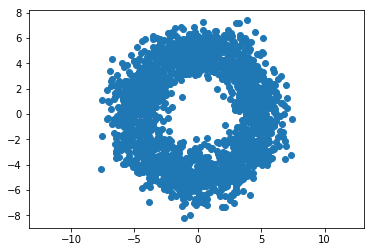

In [6]:
X = tadasets.dsphere(d=1, n=2000, r=5, noise=1)

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

First, we will compute H0 and H1 on the full point cloud of 2000 points

In [7]:
tic = time.time()
dgms_full = ripser(X)['dgms']
toc = time.time()
print("Elapsed Time Full Point Cloud: %.3g seconds"%(toc-tic))

Elapsed Time Full Point Cloud: 8.75 seconds


Now, we will subsample 400 points in the point cloud (a factor of 5 reduction) and perform persistent homology

In [8]:
tic = time.time()
res = ripser(X, n_perm=400)
toc = time.time()
print("Elapsed Time Subsampled Point Cloud: %.3g seconds"%(toc-tic))
dgms_sub = res['dgms']
idx_perm = res['idx_perm']
r_cover = res['r_cover']

Elapsed Time Subsampled Point Cloud: 0.204 seconds


Notice how this only took a split second!  But how good is the approximation?  We can plot the points that were used in the subsample to see visually, and we can look at the persistence diagrams.  

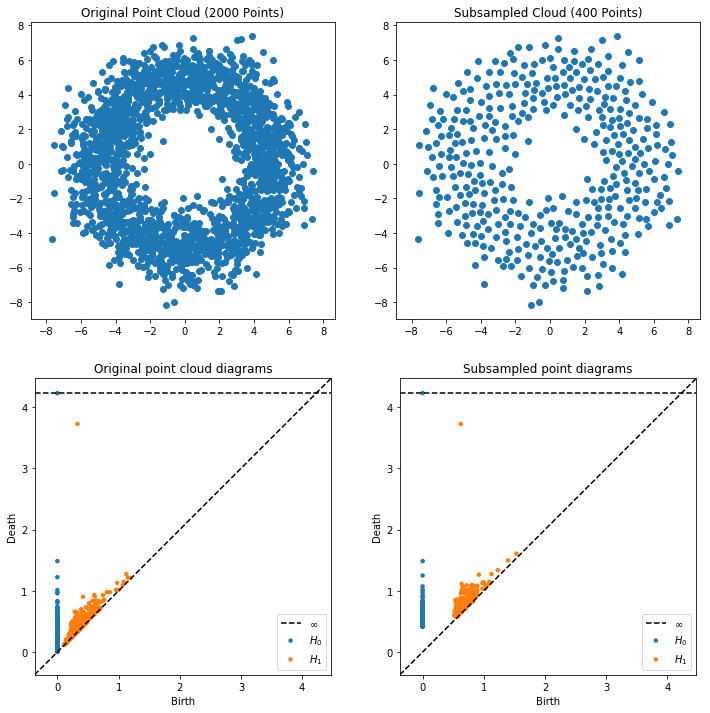

In [10]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Point Cloud (%i Points)"%(X.shape[0]))
plt.axis("equal")
plt.subplot(222)
plt.scatter(X[idx_perm, 0], X[idx_perm, 1])
plt.title("Subsampled Cloud (%i Points)"%(idx_perm.size))
plt.axis("equal")
plt.subplot(223)
plot_diagrams(dgms_full)
plt.title("Original point cloud diagrams")
plt.subplot(224)
plot_diagrams(dgms_sub)
plt.title("Subsampled point diagrams")
plt.show()


But we also have information about the "covering radius," or the radius of balls placed at the subsampled points that cover all of the original points.  In fact, twice the covering radius bounds from above the bottleneck distance between all approximate persistence diagrams and their corresponding original persistence diagram

In [14]:
print("Twice Covering radius: %.3g"%(2*r_cover))
for dim, (I1, I2) in enumerate(zip(dgms_full, dgms_sub)):
    bdist = bottleneck(I1, I2)
    print("H%i bottleneck distance: %.3g"%(dim, bdist))

Twice Covering radius: 0.833
H0 bottleneck distance: 0.241
H1 bottleneck distance: 0.295
